First steps with scikit-learn

In [14]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris() #Call iris dataset from sklearn library
X=iris.data[:,[2,3]]
y=iris.target

print('Class labels:', np.unique(y))

('Class labels:', array([0, 1, 2]))


In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler #loaded the StandardScaler class
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_train)
print y_train

[1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1
 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0
 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]


In [17]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(n_iter=40,eta0=.1,random_state=0)
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [25]:
#This code was written by python3 so that`s reason not to be excuted collectively
y_pred=ppn.predict(X_test_std)
print 'Misclassified samples: %d' % (y_test != y_pred).sum()

C:\Users\quantum\Anaconda\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  from ipykernel import kernelapp as app


AttributeError: 'bool' object has no attribute 'sum'

In [26]:
from sklearn.metrics import accuracy_score
print 'Accuracy: %.2f' % accuracy_score(y_test, y_pred)

ValueError: Found arrays with inconsistent numbers of samples: [ 45 105]

In [21]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=.02):
    # setup marker generator and color map
    markers=('s', 'x', 'o', '^', 'v')
    colors=('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
        alpha=1.0, linewidth=1, marker='o',
        s=55, label='test set')

C:\Users\quantum\Anaconda\lib\site-packages\ipykernel\__main__.py:23: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 210 but corresponding boolean dimension is 150
C:\Users\quantum\Anaconda\lib\site-packages\matplotlib\collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


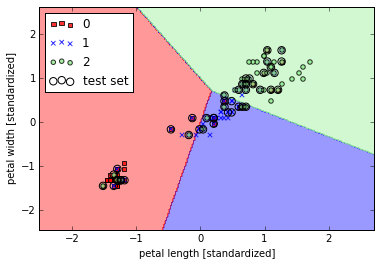

In [22]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,y=y_combined, classifier=ppn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Modeling class probabilities via logistic regression

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))



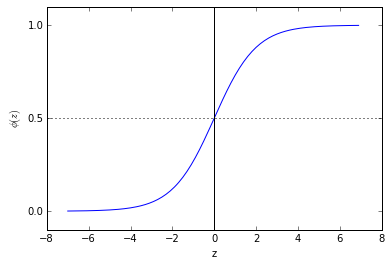

In [10]:
z=np.arange(-7,7,.1)
phi_z=sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.axhline(y=.5,ls='dotted',color='k')
plt.yticks([0.0,0.5,1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

Training a logistic regression model with scikit-learn

C:\Users\quantum\Anaconda\lib\site-packages\ipykernel\__main__.py:23: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 210 but corresponding boolean dimension is 150


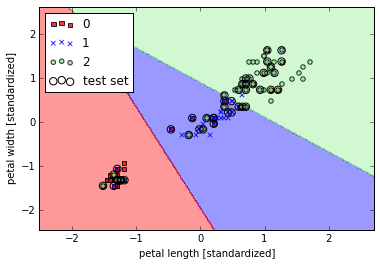

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1000.0,random_state=0)
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

In [31]:
#predict the probabilities of the first Iris-Setosa sample:
lr.predict_proba(X_test_std[0,:])

array([[  7.02177637e-03,   9.92966877e-01,   1.13469948e-05]])